#### Introduction to Curve Fitting in Python

There is an Iris flower dataset at:  http://narock.github.io/teaching/CST-411/visualization/iris.csv

Read the data using Pandas.

In [38]:
import pandas as pd
url = 'http://narock.github.io/teaching/CST-411/visualization/iris.csv'
data = pd.read_csv(url)
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


Plot the data using Matplotlib. The columns PetalLenghtCm and PetalWidthCm contain measurements, in centimeters, of Iris flower petal length and petal width, respectively.

Text(0.5,1,'Iris Flower')

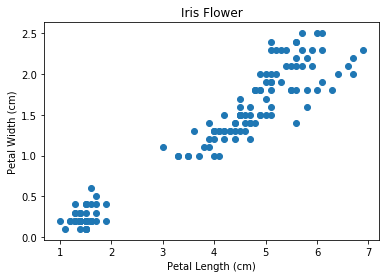

In [40]:
import matplotlib.pyplot as plt
plt.scatter(data['PetalLengthCm'], data['PetalWidthCm'])
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.title('Iris Flower')

Looks like there's a linear trend there. Let's ask Python to find the "best" fit values of m and b in y = mx + b

In [41]:
import scipy.optimize as sp
def line(x, m, b):
     return m*x + b
    
fit, covar = sp.curve_fit(line, data['PetalLengthCm'], data['PetalWidthCm'])

The fit solutions are in the same order as the line() function we defined.

In [44]:
import numpy as np
print("Best fit value of m =", np.round(fit[0],2))
print("Best fit value of b =", np.round(fit[1],2) )

Best fit value of m = 0.42
Best fit value of b = -0.37


The second value returned, covar, is the covariance matrix. The diagonals of the covariance matrix are the variance values for m and b. Taking the square root of the variance gives us the standard deviation, which we can use as an estimate of the uncertainty in our fit parameters.

In [45]:
stddev = np.sqrt(np.diag(covar))
print("Best fit value of m =", np.round(fit[0],2), "+/-", np.round(stddev[0],2))
print("Best fit value of b =", np.round(fit[1],2), "+/-", np.round(stddev[1],2))

Best fit value of m = 0.42 +/- 0.01
Best fit value of b = -0.37 +/- 0.04


Plot the data and the fit together.

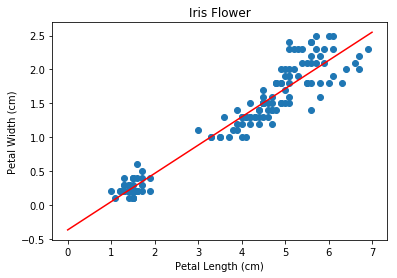

In [47]:
import numpy as np
plt.scatter(data['PetalLengthCm'], data['PetalWidthCm'])
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.title('Iris Flower')
n = len(data['PetalLengthCm'])
x = np.linspace(0, 7, n)
y = fit[0]*x + fit[1]
plt.plot( x, y, color='red' )

The Chi-square goodness of fit test is used to test if your data follows a particular distribution. It's more useful for testing model assumptions rather than comparing models. For comparing different models, I think R-squared is the best choice.

In [48]:
import scipy.stats as stats
chisq = stats.chisquare(data['PetalLengthCm'], f_exp=y)
print(chisq)

Power_divergenceResult(statistic=1126.5344036912738, pvalue=1.0716841656435062e-149)


What about a more complicated function? Let's fit heart rate data to an exponential.

In [50]:
url = 'http://apmonitor.com/che263/uploads/Main/heart_rate.txt'
data = pd.read_csv(url)
data.head()

,Time (sec),Heart Rate (BPM)
0,0.0,103
1,5.0,103
2,10.0,103
3,15.0,105
4,20.0,108


Text(0.5,1,'Heart Rate During Exercise')

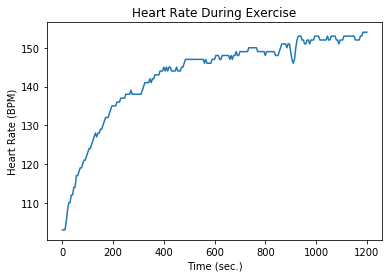

In [52]:
plt.plot(data['Time (sec)'], data['Heart Rate (BPM)'])
plt.xlabel('Time (sec.)')
plt.ylabel('Heart Rate (BPM)')
plt.title('Heart Rate During Exercise')

Theory says that heart rate should follow: BPM = c<sub>0</sub>+c<sub>1</sub>t-c<sub>2</sub>e<sup>-c3*t</sup>

In [61]:
# define standard form of function we're fitting
def bpm(t,c0,c1,c2,c3):
    bpm1 = c0+c1*t-c2*np.exp(-c3*t)
    return bpm1

# sometimes we have domain knowledge that gives us a starting point for the parameters
# let's say we think c0 is around 100, c1 is close to 0.01, c2 is about 100, and 
# c3 is close to 0.01
# this is how we include that information
p0 = [100., .01, 100, .01] 
fit,covar = sp.curve_fit(bpm, data["Time (sec)"], data["Heart Rate (BPM)"], p0=p0)

In [60]:
print("c0 =", np.round(fit[0],2) )
print("c1 =", np.round(fit[1],2) )
print("c2 =", np.round(fit[2],2) )
print("c3 =", np.round(fit[3],2) )

c0 = 142.37
c1 = 0.01
c2 = 40.03
c3 = 0.01


Text(0.5,1,'Heart Rate During Exercise')

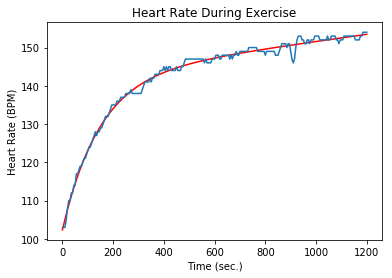

In [63]:
t = np.linspace(0, 1200, len(data["Time (sec)"]) )
y = fit[0] + fit[1]*t - fit[2]*np.exp(-fit[3]*t)
plt.plot(t, y, color='red')
plt.plot(data['Time (sec)'], data['Heart Rate (BPM)'])
plt.xlabel('Time (sec.)')
plt.ylabel('Heart Rate (BPM)')
plt.title('Heart Rate During Exercise')

In [64]:
chisq = stats.chisquare(data['Heart Rate (BPM)'], f_exp=y)
print(chisq)

Power_divergenceResult(statistic=1.5069081125496686, pvalue=1.0)
